In [0]:
from google.colab import files

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

In [0]:
!rm -rf /content/GoogleNews-vectors-negative300
!rm -rf glove.840B.300d
!rm -rf paragram_300_sl999
!rm -rf wiki-news-300d-1M
!rm -rf kaggle.json

In [0]:
!rm -rf Kaggle
!rm -rf kaggle (1).json
!rm -rf kaggle.json
!rm -rf test.csv.zip
!rm -rf train.csv.zip
!rm -rf sample_submission.csv.zip

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `rm -rf kaggle (1).json'


In [0]:
%cd /content

/content


In [0]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

kaggle.json


In [0]:
!kaggle competitions download -c quora-insincere-questions-classification

 75% 41.0M/54.4M [00:01<00:00, 22.6MB/s]
100% 54.4M/54.4M [00:01<00:00, 46.8MB/s]
100% 5.94G/5.96G [00:51<00:00, 119MB/s]
100% 5.96G/5.96G [00:51<00:00, 125MB/s]
  0% 0.00/4.08M [00:00<?, ?B/s]
100% 4.08M/4.08M [00:00<00:00, 66.9MB/s]
 77% 12.0M/15.7M [00:00<00:00, 63.2MB/s]
100% 15.7M/15.7M [00:00<00:00, 61.7MB/s]


In [0]:
%cd /content
!unzip train.csv.zip
!unzip test.csv.zip

/content
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [0]:
!mkdir /content/Kaggle
%cd

/root


In [0]:
%cd /content
!ls

/content
adc.json
embeddings.zip
Kaggle
kaggle.json
Model_LSTM_CONV_1-conv-128-layer-0-dense.h5
Model_LSTM_CONV_1-conv-32-layer-0-dense.h5
Model_LSTM_CONV_1-conv-64-layer-0-dense.h5
Model_LSTM_CONV_2-conv-128-layer-0-dense.h5
Model_LSTM_CONV_2-conv-32-layer-0-dense.h5
Model_LSTM_CONV_2-conv-64-layer-0-dense.h5
sample_data
sample_submission.csv.zip
test.csv
test.csv.zip
train.csv
train.csv.zip


In [0]:
%cd /content
!bash -c 'mv train.csv /content/Kaggle'
!bash -c 'mv test.csv /content/Kaggle'

/content


In [0]:
%cd /content/Kaggle

/content/Kaggle


In [0]:
import pandas as pd
import numpy as np
import re
import string
import pickle
import time
import h5py 
from array import *
import requests
from bs4 import BeautifulSoup

from sklearn import metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, CuDNNLSTM, GRU, CuDNNGRU, Conv1D, MaxPool1D, Dropout, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

import matplotlib.pyplot as plot
%matplotlib inline

In [0]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [0]:
test_data.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


In [0]:
train_data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [0]:
train_data

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


The training data includes the question that was asked, and whether it was identified as insincere (target = 1). The ground-truth labels contain some amount of noise: they are not guaranteed to be perfect.

In [0]:
train_data.iloc[1306112]["question_text"]

'Are you ashamed of being an Indian?'

In [0]:
train_data["target"].isnull().sum()

0

In [0]:
# To find all the punctuations.
punctuation = []
length = int(len(train_data))
for i in range(length):
  punctuation.append( re.findall(r"[^a-zA-Z0-9 ]", train_data["question_text"][i]) )


In [0]:
# To print all unique punctuations from top 100 questions.
myset = set()
for i in range(100):
  for j in range(len(punctuation[i])):
    myset.add(punctuation[i][j])
print(myset)

{'.', '*', '/', ')', '…', '(', '=', '?', '"', "'", '$', '-', ','}


In [0]:
punctuation[0:100]

[['?'],
 [',', '?'],
 ['?', '?'],
 ['?'],
 ['?'],
 [',', '?'],
 [',', '?'],
 ['?', '.'],
 [',', ',', '?'],
 [',', '/', '.', '?'],
 ['?'],
 ['?'],
 [',', '?'],
 ['.', '?'],
 [',', '.', '.', '?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 [',', '?'],
 ['?'],
 ['?'],
 ["'", '?', '?'],
 ['?'],
 ['?'],
 ['?'],
 ['?', '?'],
 ['?'],
 [',', '/', '?'],
 ['?', '?', '-', '-', '?'],
 ['?'],
 ['/', '(', ')', '?'],
 [',', "'", '?'],
 ['?'],
 [',', '?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['.', '?'],
 ['?'],
 ["'", ',', '?'],
 ['"', '"', '?'],
 ['.', '?'],
 [',', '-', '?'],
 [',', '?'],
 [',', '?'],
 ['.', '?'],
 ['?'],
 ['(', ',', ',', ')', '(', '.', ')', ',', '?'],
 ['?'],
 ['?'],
 ["'", '?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 ['?'],
 [',', ',', '?'],
 ['?'],
 ["'", '?'],
 ['?'],
 ["'", '?'],
 ['?'],
 ['?'],
 ['?'],
 ['?', '?'],
 ['?'],
 ['?'],
 ['?'],
 ['?', '?'],
 ['?', '.'],
 ['?'],
 ['?'],
 ['$', '?'],
 ['?'],
 ['?'],
 ['(', '.', ')', 

We have come up with different hindi letters, lets see if they are acrually present in the questions or not.

In [0]:
train_data["question_text"][0].find("1960")

66

In [0]:
print(punctuation[0])
print(punctuation[1])

['?']
[',', '?']


In [1]:
!pip install requests

In [0]:
website_url = requests.get("https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions").text
soup = BeautifulSoup(website_url, 'lxml')
#print(soup)

In [0]:
# we need "wikitable sortable" file from the html script.
table = soup.find('table', {'class' : 'wikitable sortable'})
#table

In [4]:
#columns = soup.find_all('td')
contraction_list = []
meaning_list = []
for row in table.find_all('tr')[1:]:  # iterate over the rows, starting from 
                                      # the second (first one is the header row)
    contraction = row.find_all('td')[0]  #  the Symbol col is the first <td> in every row 
    meaning = row.find_all('td')[1]  #  the Symbol col is the first <td> in every row
        
    contraction_list.append(contraction.text)
    meaning_list.append(meaning.text)

print(contraction_list)
print(meaning_list)

["ain't", "amn't", "aren't", "can't (rarely, cain't)", "'cause", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", "doesn't", "don't", "e'er", "everyone's", 'finna', 'gimme', 'giv’n', 'gonna', "gon't", 'gotta', "hadn't", "hasn't", "haven't", "he'd", "he'll", "he's", "he've", "how'd", 'howdy', "how'll", "how're", "how's", "I'd", "I'll", "I'm", "I'm'a", "I'm'o", "I've", "isn't", "it'd", "it'll", "it's", "let's", "ma'am", "mayn't", "may've", "mightn't", "might've", "mustn't", "mustn't've", "must've", "needn't", "ne'er", "o'clock", "o'er", "ol'", "oughtn't", "'s", "shalln't", "shan't", "she'd", "she'll", "she's", "should've", "shouldn't", "shouldn't've", "somebody's", "someone's", "something's", "so're", "that'll", "that're", "that's", "that'd", "there'd", "there'll", "there're", "there's", "these're", "they'd", "they'll", "they're", "they've", "this's", "those're", "'tis", "'twas", "wasn't", "we'd", "we'd've", "we'll", "we're", "we've", "weren't", "what'd",

In [5]:
# Preprocess the words

#splitword = []
#print(len(contraction_list))
#print(len(meaning_list))
for word in contraction_list:
  #print(word)
  if (' ' in word):
    position_to_add = contraction_list.index(word)
    meaning_word = meaning_list[position_to_add]
    
    word_to_process = re.sub(r'[(),]', "", word)
    splitword = word_to_process.split()
    length_split_word = len(splitword)
    #print(splitword)
    
    contraction_list.remove(word)
    meaning_list.pop(position_to_add)
    
    for i in range(len(splitword)):
      contraction_list.insert((position_to_add + i), splitword[i] )
      meaning_list.insert((position_to_add + i), meaning_word)
    break
    #print(splitword)
print(contraction_list)
print(meaning_list)

#print(len(contraction_list))
#print(len(meaning_list))

["ain't", "amn't", "aren't", "can't", 'rarely', "cain't", "'cause", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", "doesn't", "don't", "e'er", "everyone's", 'finna', 'gimme', 'giv’n', 'gonna', "gon't", 'gotta', "hadn't", "hasn't", "haven't", "he'd", "he'll", "he's", "he've", "how'd", 'howdy', "how'll", "how're", "how's", "I'd", "I'll", "I'm", "I'm'a", "I'm'o", "I've", "isn't", "it'd", "it'll", "it's", "let's", "ma'am", "mayn't", "may've", "mightn't", "might've", "mustn't", "mustn't've", "must've", "needn't", "ne'er", "o'clock", "o'er", "ol'", "oughtn't", "'s", "shalln't", "shan't", "she'd", "she'll", "she's", "should've", "shouldn't", "shouldn't've", "somebody's", "someone's", "something's", "so're", "that'll", "that're", "that's", "that'd", "there'd", "there'll", "there're", "there's", "these're", "they'd", "they'll", "they're", "they've", "this's", "those're", "'tis", "'twas", "wasn't", "we'd", "we'd've", "we'll", "we're", "we've", "weren't", "what'

In [0]:
# pop out last two element
del contraction_list[-2:]
del meaning_list[-2:]

print(contraction_list)
print(meaning_list)

["ain't", "amn't", "aren't", "can't", 'rarely', "cain't", "'cause", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", "doesn't", "don't", "e'er", "everyone's", 'finna', 'gimme', 'gonna', "gon't", 'gotta', "hadn't", "hasn't", "haven't", "he'd", "he'll", "he's", "he've", "how'd", "how'll", "how're", "how's", "I'd", "I'll", "I'm", "I'm'a", "I'm'o", "I've", "isn't", "it'd", "it'll", "it's", "let's", "mayn't", "may've", "mightn't", "might've", "mustn't", "mustn't've", "must've", "needn't", "ne'er", "o'clock", "o'er", "ol'", "oughtn't", "'s", "shalln't", "shan't", "she'd", "she'll", "she's", "should've", "shouldn't", "shouldn't've", "somebody's", "someone's", "something's", "so're", "that'll", "that're", "that's", "that'd", "there'd", "there'll", "there're", "there's", "these're", "they'd", "they'll", "they're", "they've", "this's", "those're", "'tis", "'twas", "wasn't", "we'd", "we'd've", "we'll", "we're", "we've", "weren't", "what'd", "what'll", "what're", "

Now, our contraction list is well defined, we need to process meaning list.

In [0]:
meaningfull_list = []
def process_word(word):
  
  word = re.sub(r"[0-9]", "", word)
  word = re.sub(r"\n", "", word)
  word = word.replace('[','').replace(']','')
  word = word.replace(' (colloquial)', '')
  word = word.replace(' (archaic)', '')
  meaningfull_list.append(word)
  
  return meaningfull_list
#[re.sub(r'[0-9]', '', word) if ('[]' in word) else x for x in meaning_list]

for word in meaning_list:
  meaningfull_list = process_word(word)
#meaningfull_list

Now that we have process the words, lets split these too!

In [0]:
print(len(contraction_list))
print(len(meaningfull_list))

for word in meaningfull_list:
  if (' / ' in word or ", " in word):
    position_to_split = meaningfull_list.index(word)
    
    word_to_process = re.sub(r' / ', ",", word)
    splitword = word_to_process.split(',')
    length_split_word = len(splitword)
    
    meaningfull_list.remove(word)
    meaningfull_list.insert((position_to_split ), splitword[0] ) # For simplicity lets add only 1st word.

print(contraction_list)
print(meaningfull_list)

#print(len(contraction_list))
#print(len(meaningfull_list))


123
123
["ain't", "amn't", "aren't", "can't", 'rarely', "cain't", "'cause", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", "doesn't", "don't", "e'er", "everyone's", 'finna', 'gimme', 'gonna', "gon't", 'gotta', "hadn't", "hasn't", "haven't", "he'd", "he'll", "he's", "he've", "how'd", "how'll", "how're", "how's", "I'd", "I'll", "I'm", "I'm'a", "I'm'o", "I've", "isn't", "it'd", "it'll", "it's", "let's", "mayn't", "may've", "mightn't", "might've", "mustn't", "mustn't've", "must've", "needn't", "ne'er", "o'clock", "o'er", "ol'", "oughtn't", "'s", "shalln't", "shan't", "she'd", "she'll", "she's", "should've", "shouldn't", "shouldn't've", "somebody's", "someone's", "something's", "so're", "that'll", "that're", "that's", "that'd", "there'd", "there'll", "there're", "there's", "these're", "they'd", "they'll", "they're", "they've", "this's", "those're", "'tis", "'twas", "wasn't", "we'd", "we'd've", "we'll", "we're", "we've", "weren't", "what'd", "what'll", "wha

In [0]:
#dictionary = dict(zip(contraction_list, meaningfull_list))
dictionary = {k: v for k,v in zip(contraction_list, meaningfull_list)}
dictionary

{"'cause": 'because',
 "'s": 'is',
 "'tis": 'it is',
 "'twas": 'it was',
 "I'd": 'I had',
 "I'll": 'I shall',
 "I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "ain't": 'am not',
 "amn't": 'am not',
 "aren't": 'are not',
 "cain't": 'cannot',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "e'er": 'ever',
 "everyone's": 'everyone is',
 'finna': 'fixing to',
 'gimme': 'give me',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had',
 "he'll": 'he shall',
 "he's": 'he has',
 "he've": 'he have',
 "how'd": 'how did',
 "how'll": 'how will',
 "how're": 'how are',
 "how's": 'how has',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'll": 'it shall',
 "it's": 'it has',
 "

In [0]:
# Review the questions:
def mappingWords(questions,dictionary):
    return " ".join([dictionary.get(w,w) for w in questions.split()])

def review_questions(questions):
  #questions = mappingWords(questions, dictionary)
  questions = re.sub(r"[^a-zA-Z0-9 ]", " ", questions)
  questions = re.sub(r'[0-9]+', "Number", questions)
  return questions


In [0]:
question_list = []
for i in range(len(train_data["question_text"])):
  question_list.append(review_questions(train_data["question_text"][i]))

In [0]:
question_list[0]

'How did Quebec nationalists see their province as a nation in the Numbers '

In [0]:
# Save the data in .pickle format
pickle_input = open("input_question_X.pickle", "wb")
pickle.dump(question_list, pickle_input)
pickle_input.close()

pickle_output = open("output_question_y.pickle", "wb")
pickle.dump(train_data["target"], pickle_output)
pickle_output.close()

In [0]:
# Create & upload a file text file.
uploaded = drive.CreateFile()
uploaded.SetContentFile('input_question_X.pickle')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded_y = drive.CreateFile()
uploaded_y.SetContentFile('output_question_y.pickle')
uploaded_y.Upload()
print('Uploaded file with ID {}'.format(uploaded_y.get('id')))


Uploaded file with ID 1HAHGC7SA-8Baljm1sQQc4Jk9IT-czCoG
Uploaded file with ID 1eY5QXEMYowrJGwyYeyXQHVapdvkLyq1R


In [0]:
downloaded_input = drive.CreateFile({'id': '1HAHGC7SA-8Baljm1sQQc4Jk9IT-czCoG'})
downloaded_input.GetContentFile('input_question_X.pickle')

downloaded_output = drive.CreateFile({'id': '1eY5QXEMYowrJGwyYeyXQHVapdvkLyq1R'})
downloaded_output.GetContentFile('output_question_y.pickle')

    100% |████████████████████████████████| 993kB 23.4MB/s 


In [0]:
# To find all the punctuations.
checkpunctuation = []
length = int(len(question_list))
for i in range(length):
  checkpunctuation.append( re.findall(r"[^a-zA-Z ]", question_list[i]) )


In [0]:
# Converting list into dataframe, to check if it is empty or not!
punctuationdf = pd.DataFrame({ "punctuation" : checkpunctuation })
punctuationdf["punctuation"].isnull().sum()

0

In [0]:
# To print punctuations from top 100 questions.
myCheckSet = set()
for i in range(len(checkpunctuation)):

  for j in range(len(checkpunctuation[i])):
    myset.add(checkpunctuation[i][j])
print(myCheckSet)

set()


So, now, there are no punctuation marks in whole dataset.

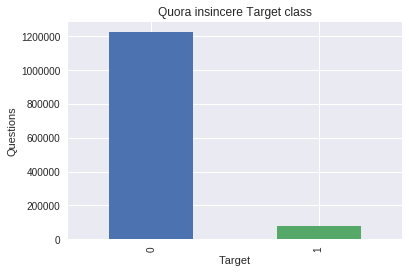

In [0]:
# check out the skewed data
get_pickle_output = open("output_question_y.pickle", "rb")
y = pickle.load(get_pickle_output)

unique_target = pd.value_counts(y, sort = True).sort_index()
unique_target.plot(kind = 'bar')
plot.title("Quora insincere Target class")
plot.xlabel("Target")
plot.ylabel("Questions")
plot.show()

In [0]:
# Let's try different embeddings.
%cd /content
!unzip embeddings.zip

/content
Archive:  embeddings.zip
   creating: GoogleNews-vectors-negative300/
   creating: glove.840B.300d/
   creating: paragram_300_sl999/
   creating: wiki-news-300d-1M/
  inflating: glove.840B.300d/glove.840B.300d.txt  
  inflating: GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin  
  inflating: wiki-news-300d-1M/wiki-news-300d-1M.vec  
  inflating: paragram_300_sl999/README.txt  
  inflating: paragram_300_sl999/paragram_300_sl999.txt  


In [0]:
%cd /content
!bash -c 'mv glove.840B.300d /content/Kaggle'

/content


In [0]:
%cd /content/Kaggle

/content/Kaggle


Let's import GloVe
https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

In [0]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r', encoding='utf8')
    embedding_index = {}
    print("Opened!")
    for line in f:
        splitLine = line.split(' ')
        word = splitLine[0]
        embedding = np.asarray(splitLine[1:], dtype='float32')
        embedding_index[word] = embedding
        
    print("Done.",len(embedding_index)," words loaded!")
    return embedding_index

In [0]:
gloveFile = 'glove.840B.300d/glove.840B.300d.txt'
embedding_index = loadGloveModel(gloveFile)

Loading Glove Model
Opened!
Done. 2196016  words loaded!


In [0]:
# First of all, lets just plug the data directly into our learning model.

In [0]:
%cd /content
# Get the training X, and y data.
get_pickle_X = open("input_question_X.pickle", "rb")
X= pickle.load(get_pickle_X)

get_pickle_y = open("output_question_y.pickle", "rb")
y= pickle.load(get_pickle_y)


/content


In [0]:
'''# Split the  data into trainig, testing, and cross validation.
def split_data(data):
  # my data to be splitted.
  split_index = int(len(train_data) * 0.9)
  X_train = X[:split_index]
  y_train = y[:split_index]
  
  X_val = X[split_index:]
  y_val = y[split_index:]
  
  return X_train, X_val, y_train, y_val 
'''

In [0]:
data = [X, y]

#X_train, X_val, y_train, y_val = split_data(data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.05)

#print(np.array((X)).shape)
#print(np.array((X_train)).shape)
#print(np.array((X_val)).shape)

In [0]:
# process test question_text column.
question_list_test = []
for i in range(len(test_data["question_text"])):
    question_list_test.append(review_questions(test_data["question_text"][i]))

X_test = question_list_test


In [0]:
# Generate the text sequence for RNN model
np.random.seed(1000)
NUM_MOST_FREQ_WORDS_TO_INCLUDE = 100000
MAX_REVIEW_LENGTH_FOR_KERAS_RNN = 80           # Input for keras.
embedding_vector_length = 32

all_quesion = X_train + X_val

tokenizer = Tokenizer(num_words = NUM_MOST_FREQ_WORDS_TO_INCLUDE)
tokenizer.fit_on_texts(all_quesion)

word_index = tokenizer.word_index

#tokenising train data
train_question_tokenized = tokenizer.texts_to_sequences(X_train)      
X_train = pad_sequences(train_question_tokenized, maxlen = MAX_REVIEW_LENGTH_FOR_KERAS_RNN)          # len(X_train) x 50

#tokenising validation data
val_question_tokenized = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_question_tokenized, maxlen = MAX_REVIEW_LENGTH_FOR_KERAS_RNN)               # len(X_val) X 50 

#tokenizing test data
#test_question_tokenized = tokenizer.texts_to_sequences(X_test)
#X_test = pad_sequences(test_question_tokenized, maxlen = MAX_REVIEW_LENGTH_FOR_KERAS_RNN)

save_tokenizer = open("Tokenizer.pickle", "wb")
pickle.dump(tokenizer, save_tokenizer)
save_tokenizer.close()

In [0]:
# 2. Create & upload a file text file.
uploaded = drive.CreateFile()
uploaded.SetContentFile('Tokenizer.pickle')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))


Uploaded file with ID 1Xat5JsRVZz9BgPKICyAaDZ7ZFEeRxZbt


In [0]:
print('Found %s unique tokens.' % len(word_index))

Found 181933 unique tokens.


In [0]:
# Now, we need to create embedding matrix.
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
h5file = h5py.File("embedding_matrix.h5")
h5file.create_dataset("embedding_matrix", data=embedding_matrix)

<HDF5 dataset "embedding_matrix": shape (181936, 300), type "<f8">

In [0]:
# save embedding matrix in .pickle format.
%cd /content/Kaggle
my_embedd = open("glove_840B_300D_embedding.pickle", "wb")
pickle.dump(embedding_matrix, my_embedd)
my_embedd.close()

[Errno 2] No such file or directory: '/content/Kaggle'
/content


In [0]:
get_embedd = open("glove_840B_300D_embedding.pickle", "rb")
embedding_matrix = pickle.load(get_embedd)
get_embedd.close()

In [0]:
# 2. Create & upload a file text file.
uploaded = drive.CreateFile()
uploaded.SetContentFile('glove_840B_300D_embedding.pickle')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))


Uploaded file with ID 16YeNHHCVABMfAzbWnqxss0GPD6mMRoz-


In [0]:
EMBEDDING_DIM = 300
downloaded_embedd = drive.CreateFile({'id': '16YeNHHCVABMfAzbWnqxss0GPD6mMRoz-'})
downloaded_embedd.GetContentFile('glove_840B_300D_embedding.pickle')

my_embedd = open("glove_840B_300D_embedding.pickle", "rb")
embedding_matrix = pickle.load(my_embedd)
my_embedd.close() ooooo

In [0]:
def RNNModel():
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix],
                      input_length=MAX_REVIEW_LENGTH_FOR_KERAS_RNN, trainable=False) )

    model.add(Dropout(0.2))
    model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(MaxPool1D(pool_size = 2))

    model.add(CuDNNGRU(100, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(CuDNNGRU(100, return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(32, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))


    model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return model  

In [0]:
model = RNNModel()
model.fit(X_train, y_train, batch_size=64, epochs = 1, validation_data=[X_val, y_val])

Train on 1240815 samples, validate on 65307 samples
Epoch 1/1
1240815/1240815 [==============================] - 459s 370us/step - loss: 0.1191 - acc: 0.9531 - val_loss: 0.1142 - val_acc: 0.9558


In [0]:
my_model_save = open("1st_model.pickle", "wb")
pickle.dump('model.h5', my_model_save)
my_model_save.close()


In [0]:
y_val_prediction = model.predict(X_val)
y_val_prediction

array([[0.67515016],
       [0.21627244],
       [0.00418785],
       ...,
       [0.00772439],
       [0.3626201 ],
       [0.00260632]], dtype=float32)

In [0]:
y_train_prediction = model.predict(X_train)
y_train_prediction

array([[0.00930867],
       [0.00446617],
       [0.00388651],
       ...,
       [0.00183088],
       [0.02422588],
       [0.46029472]], dtype=float32)

## Hyper Parameter Tuning

In [0]:
def get_best_threshold_value(y_val, y_val_prediction, threshold_list):
  best_f1 = 0
  best_threshold_value = threshold_list[0]
  
  for threshold in threshold_list:
    score = metrics.f1_score(y_val, (y_val_prediction > threshold).astype(int))

    # We need our f1_score to be maximum as possible.
    if(score > best_f1):
      best_f1 = score
      best_threshold_value = threshold
  
  return best_threshold_value

In [0]:
def F1_Score(y_val, y_val_prediction):
  # Lets calculate the threshold value for f1 score.
  threshold_list = np.arange(0.2, 0.701, 0.02)

  best_threshold_value = get_best_threshold_value(y_val, y_val_prediction, threshold_list)

  # Use sklearn to get the f1score, using this best threshold value.
  f1score = metrics.f1_score(y_val, (y_val_prediction > best_threshold_value).astype(int))
  
  return f1score, best_threshold_value

In [0]:
# Model

dense_layers = [0]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]
#drop_out = [0.2, 0.5]

# Clearing tensorflow session right before creating the model
# https://stackoverflow.com/questions/50479021/keras-callback-causes-error-you-must-feed-a-value-for-placeholder-tensor-conv/52239671#52239671
K.clear_session()

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)
      print(NAME)

      model = Sequential()

      model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix],
          input_length=MAX_REVIEW_LENGTH_FOR_KERAS_RNN, trainable=False) )

      model.add(Dropout(0.2))

      model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
      model.add(MaxPool1D(pool_size = 2))

      for l in range(conv - 1):
        model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
        model.add(MaxPool1D(pool_size = 2))

      model.add( CuDNNLSTM(128, return_sequences=True))
      model.add(Dropout(0.2))

      model.add( CuDNNLSTM(64, return_sequences=False))
      model.add(Dropout(0.2))

      model.add(Flatten())

      for n in range(dense):
        model.add(Dense(filters, activation = "relu"))

      model.add(Dense(1, activation = "sigmoid"))
      
      model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

      model.summary()
      model.fit(X_train, y_train, batch_size = 32, epochs = 1, validation_data = [X_val, y_val] )

      model.save("{}.h5".format(NAME))
      
      K.clear_session()

            

Model_LSTM_CONV_1-conv-32-layer-0-dense
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 300)           54580200  
_________________________________________________________________
dropout (Dropout)            (None, 80, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80, 32)            28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 32)            0         
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 40, 128)           82944     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 

In [0]:
# Save models in google drive.
dense_layers = [0]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]
#drop_out = [0.2, 0.5]

# Clearing tensorflow session right before creating the model
# https://stackoverflow.com/questions/50479021/keras-callback-causes-error-you-must-feed-a-value-for-placeholder-tensor-conv/52239671#52239671
K.clear_session()

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)
      #print(NAME)

      # 2. Create & upload a file text file.
      uploaded = drive.CreateFile()
      uploaded.SetContentFile('{}.h5'.format(NAME))
      uploaded.Upload()
      print('Uploaded file with ID {}'.format(uploaded.get('id')))



Uploaded file with ID 1XcR0Gr7GXKcYkWwJ1hJd63aV_nULFyht
Uploaded file with ID 1ws6EwnFLDW_MLcIZE8481dpYEj-F8f3f
Uploaded file with ID 1MU9kmIBO_4MNLL57WI-2TngQTsGKyF0g
Uploaded file with ID 1B_bVHXM1f1MqztfKTLTEIKVSQhTojP-7
Uploaded file with ID 1EGTDXDs8U2LIyNESsMpnptTmtJOLhpJP
Uploaded file with ID 1SzhmFsq6zVgjyxn90kEI-EWGcqAUoG7t


In [0]:
%cd /content

/content


In [0]:
# upload models from google drive.
# Clearing tensorflow session right before creating the model
# https://stackoverflow.com/questions/50479021/keras-callback-causes-error-you-must-feed-a-value-for-placeholder-tensor-conv/52239671#52239671
#K.clear_session()

id = [ '1XcR0Gr7GXKcYkWwJ1hJd63aV_nULFyht',
       '1ws6EwnFLDW_MLcIZE8481dpYEj-F8f3f',
       '1MU9kmIBO_4MNLL57WI-2TngQTsGKyF0g',
       '1B_bVHXM1f1MqztfKTLTEIKVSQhTojP-7',
       '1EGTDXDs8U2LIyNESsMpnptTmtJOLhpJP',
       '1SzhmFsq6zVgjyxn90kEI-EWGcqAUoG7t' ]


dense_layers = [0]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]
#drop_out = [0.2, 0.5]
%cd /content/Kaggle

# Clearing tensorflow session right before creating the model
# https://stackoverflow.com/questions/50479021/keras-callback-causes-error-you-must-feed-a-value-for-placeholder-tensor-conv/52239671#52239671

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)
      for i in id:
        # 3. Load a file by ID and print its contents.
        downloaded = drive.CreateFile({'id': i})
        downloaded.GetContentFile("{}.h5".format(NAME))


/content/Kaggle


In [0]:
dense_layers = [0]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      uploadmodel = load_model('{}.h5'.format(NAME))
      y_val_prediction = uploadmodel.predict(X_val)
            
      f1_score, best_threshold_value = F1_Score(y_val, y_val_prediction)
      print('{}-> {} -> {}'.format(NAME, f1_score, best_threshold_value))

Model_LSTM_CONV_1-conv-32-layer-0-dense-> 0.5119033232628399 -> 0.22
Model_LSTM_CONV_2-conv-32-layer-0-dense-> 0.5119033232628399 -> 0.22
Model_LSTM_CONV_1-conv-64-layer-0-dense-> 0.5119033232628399 -> 0.22
Model_LSTM_CONV_2-conv-64-layer-0-dense-> 0.5119033232628399 -> 0.22
Model_LSTM_CONV_1-conv-128-layer-0-dense-> 0.5119033232628399 -> 0.22
Model_LSTM_CONV_2-conv-128-layer-0-dense-> 0.5119033232628399 -> 0.22


F1_score for x_validation comes out to be around 0.51, with 0 dense layer, despite having 32, 64, 128 layers or 1 o2 convolutional layer.<Br/>
Let's build model with 1 dense layer.

In [0]:
# Model with 1 dense layer.
dense_layers = [1]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

# Clearing tensorflow session right before creating the model
K.clear_session()

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)
      print(NAME)

      model = Sequential()

      model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix],
          input_length=MAX_REVIEW_LENGTH_FOR_KERAS_RNN, trainable=False) )

      model.add(Dropout(0.2))

      model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
      model.add(MaxPool1D(pool_size = 2))

      for l in range(conv - 1):
        model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
        model.add(MaxPool1D(pool_size = 2))

      model.add( CuDNNLSTM(128, return_sequences=True))
      model.add(Dropout(0.2))

      model.add( CuDNNLSTM(64, return_sequences=False))
      model.add(Dropout(0.2))

      model.add(Flatten())

      for n in range(dense):
        model.add(Dense(filters, activation = "relu"))

      model.add(Dense(1, activation = "sigmoid"))
      
      model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

      model.summary()
      model.fit(X_train, y_train, batch_size = 32, epochs = 1, validation_data = [X_val, y_val] )

      model.save("{}.h5".format(NAME))
      
      K.clear_session()

            

Model_LSTM_CONV_1-conv-32-layer-1-dense
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 300)           54580200  
_________________________________________________________________
dropout (Dropout)            (None, 80, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80, 32)            28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 32)            0         
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 40, 128)           82944     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 

In [0]:
# Save models in google drive.

# saving the model in google drive
dense_layers = [1]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:
      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      # 2. Create & upload a file text file.
      uploaded = drive.CreateFile()
      uploaded.SetContentFile('{}.h5'.format(NAME))
      uploaded.Upload()
      print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1fMOytiMB4a-ngi8CXB4XSBD3DeHZILg9
Uploaded file with ID 1qTZ1ix5tm-zrCWDPe0I8BQnTejZF0YcD
Uploaded file with ID 1Q7oTH13l-yn7TIrhb4rJW8L2KdN-mmzm
Uploaded file with ID 1OQWAX5eAH-j-lomAXYgCxIJthzVzgIZQ
Uploaded file with ID 1T4tivn-pnXD_i3pqO0P5xvaqPvyBM6hy
Uploaded file with ID 1GG5uXRESHsBOjyo_6sltZfBHrB_RY9gX


In [0]:
#Calculate f1 score of validation data of each models.
dense_layers = [1]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      uploadmodel = load_model('{}.h5'.format(NAME))
      y_val_prediction = uploadmodel.predict(X_val)
            
      f1_score, best_threshold_value = F1_Score(y_val, y_val_prediction)
      print('{}-> {} -> {}'.format(NAME, f1_score, best_threshold_value))

Model_LSTM_CONV_1-conv-32-layer-1-dense-> 0.6512166859791425 -> 0.35999999999999993
Model_LSTM_CONV_2-conv-32-layer-1-dense-> 0.6415689810640216 -> 0.35999999999999993
Model_LSTM_CONV_1-conv-64-layer-1-dense-> 0.6570338689168882 -> 0.24
Model_LSTM_CONV_2-conv-64-layer-1-dense-> 0.6494880938686299 -> 0.33999999999999997
Model_LSTM_CONV_1-conv-128-layer-1-dense-> 0.6496032189560746 -> 0.3799999999999999
Model_LSTM_CONV_2-conv-128-layer-1-dense-> 0.6430890538033395 -> 0.35999999999999993


So, adding one more dense layer, does make a huge difference, where f1 score jumps from 0.51 to 0.65. <Br/>
In particular, with 1 convolution, and 64 layers comes out to be the best.
First, Let's add one more dense layer, after that, we will try to increase the layer size.
In general, with 1 convolution, f1 score is coming out to be the highest.

In [0]:
# 
# Model with 1 dense layer.

dense_layers = [2]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

# Clearing tensorflow session right before creating the model
K.clear_session()

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)
      print(NAME)

      model = Sequential()

      model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix],
          input_length=MAX_REVIEW_LENGTH_FOR_KERAS_RNN, trainable=False) )

      model.add(Dropout(0.2))

      model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
      model.add(MaxPool1D(pool_size = 2))

      for l in range(conv - 1):
        model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
        model.add(MaxPool1D(pool_size = 2))

      model.add( CuDNNLSTM(128, return_sequences=True))
      model.add(Dropout(0.2))

      model.add( CuDNNLSTM(64, return_sequences=False))
      model.add(Dropout(0.2))

      model.add(Flatten())

      for n in range(dense):
        model.add(Dense(filters, activation = "relu"))

      model.add(Dense(1, activation = "sigmoid"))
      
      model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

      model.summary()
      model.fit(X_train, y_train, batch_size = 32, epochs = 1, validation_data = [X_val, y_val] )

      model.save("{}.h5".format(NAME))
      
      K.clear_session()


Model_LSTM_CONV_1-conv-32-layer-2-dense
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 300)           54580200  
_________________________________________________________________
dropout (Dropout)            (None, 80, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80, 32)            28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 32)            0         
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 40, 128)           82944     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 

In [0]:
# Save models in google drive.

dense_layers = [2]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:
      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      # 2. Create & upload a file text file.
      uploaded = drive.CreateFile()
      uploaded.SetContentFile('{}.h5'.format(NAME))
      uploaded.Upload()
      print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 18-djnHxQENF1MHiTF7b-u57O4iYNH5v3
Uploaded file with ID 16uJqIRTzFx8DsEqWw0ham7vO7QwWFk4-
Uploaded file with ID 1Yh0_u90lSsrHXGD93ByJ4PTWuxAlepDy
Uploaded file with ID 1gtuHf8_pG1T-xx7H_I2RPMO7efTK6UFO
Uploaded file with ID 1LPY7GRR6ESXJFz0rd1Zv5ZbpcTSvEivk
Uploaded file with ID 1XCXwv-sBv690QIBazfL01bj1fkuqYOf9


In [0]:
#Calculate f1 score of validation data of each models.

dense_layers = [2]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_LSTM_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      uploadmodel = load_model('{}.h5'.format(NAME))
      y_val_prediction = uploadmodel.predict(X_val)
            
      f1_score, best_threshold_value = F1_Score(y_val, y_val_prediction)
      print('{}-> {} -> {}'.format(NAME, f1_score, best_threshold_value))

Model_LSTM_CONV_1-conv-32-layer-2-dense-> 0.64423646487383 -> 0.31999999999999995
Model_LSTM_CONV_2-conv-32-layer-2-dense-> 0.6399613899613898 -> 0.35999999999999993
Model_LSTM_CONV_1-conv-64-layer-2-dense-> 0.6468472788300168 -> 0.3799999999999999
Model_LSTM_CONV_2-conv-64-layer-2-dense-> 0.6430529663340279 -> 0.31999999999999995
Model_LSTM_CONV_1-conv-128-layer-2-dense-> 0.6513427934795355 -> 0.35999999999999993
Model_LSTM_CONV_2-conv-128-layer-2-dense-> 0.6460076905677449 -> 0.33999999999999997


So, adding one more dense layer, did not make much difference.
We will continue with only one dense layer.<Br>
  So, our model for LSTM will be -> Model_LSTM_CONV_1-conv-64-layer-1-dense with f1 score of 0.6570338689168882, with threshold of 0.24.

In [0]:
# GRU model

dense_layers = [0]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

# Clearing tensorflow session right before creating the model
K.clear_session()

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_GRU_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)
      print(NAME)

      model = Sequential()

      model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix],
          input_length=MAX_REVIEW_LENGTH_FOR_KERAS_RNN, trainable=False) )

      model.add(Dropout(0.2))

      model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
      model.add(MaxPool1D(pool_size = 2))

      for l in range(conv - 1):
        model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
        model.add(MaxPool1D(pool_size = 2))

      model.add( CuDNNGRU(128, return_sequences=True))
      model.add(Dropout(0.2))

      model.add( CuDNNGRU(64, return_sequences=False))
      model.add(Dropout(0.2))

      model.add(Flatten())

      for n in range(dense):
        model.add(Dense(filters, activation = "relu"))

      model.add(Dense(1, activation = "sigmoid"))
      
      model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

      model.summary()
      model.fit(X_train, y_train, batch_size = 32, epochs = 1, validation_data = [X_val, y_val] )

      model.save("{}.h5".format(NAME))
      
      K.clear_session()


Model_GRU_CONV_1-conv-32-layer-0-dense
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 300)           54580200  
_________________________________________________________________
dropout (Dropout)            (None, 80, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80, 32)            28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 32)            0         
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 40, 128)           62208     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 6

In [0]:
# Save models in google drive.

dense_layers = [0]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:
      NAME = "Model_GRU_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      # 2. Create & upload a file text file.
      uploaded = drive.CreateFile()
      uploaded.SetContentFile('{}.h5'.format(NAME))
      uploaded.Upload()
      print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1P9JpGfcjxCY1z0hsjrb8wxSO7beRG3Ld
Uploaded file with ID 1cbDq8msRNhFNlBOFsllt4HW78XODXh8s
Uploaded file with ID 1OUOdvCcScI7YHBUJUxRJ5Nvk03MmRlK2
Uploaded file with ID 1lWCu1WgA7FZJcATdpjVQdAWk8ddd-55H
Uploaded file with ID 1DxVrrj0z-kZ6_NIk4Qb_nLBdUlG8B-Rc
Uploaded file with ID 15nmVp9LvSdMLt2GHA7sITjenVTPp0KB7


In [0]:
#Calculate f1 score of validation data of each models.

dense_layers = [0]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_GRU_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      uploadmodel = load_model('{}.h5'.format(NAME))
      y_val_prediction = uploadmodel.predict(X_val)
            
      f1_score, best_threshold_value = F1_Score(y_val, y_val_prediction)
      print('{}-> {} -> {}'.format(NAME, f1_score, best_threshold_value))

Model_GRU_CONV_1-conv-32-layer-0-dense-> 0.6404140414041405 -> 0.26
Model_GRU_CONV_2-conv-32-layer-0-dense-> 0.6370829033367734 -> 0.2
Model_GRU_CONV_1-conv-64-layer-0-dense-> 0.6484916201117319 -> 0.27999999999999997
Model_GRU_CONV_2-conv-64-layer-0-dense-> 0.6413017468293851 -> 0.26
Model_GRU_CONV_1-conv-128-layer-0-dense-> 0.6503504538664828 -> 0.33999999999999997
Model_GRU_CONV_2-conv-128-layer-0-dense-> 0.6406303528605687 -> 0.27999999999999997


Comparing these values from LSTM model, with 0 dense layer, which was around 0.5119, these values are comimg out to be the best.
Also, LSTM with 1 and 2 dense layer, are very near to these value.

In [0]:
# GRU model

dense_layers = [1]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

# Clearing tensorflow session right before creating the model
K.clear_session()

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_GRU_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)
      print(NAME)

      model = Sequential()

      model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix],
          input_length=MAX_REVIEW_LENGTH_FOR_KERAS_RNN, trainable=False) )

      model.add(Dropout(0.2))

      model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
      model.add(MaxPool1D(pool_size = 2))

      for l in range(conv - 1):
        model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
        model.add(MaxPool1D(pool_size = 2))

      model.add( CuDNNGRU(128, return_sequences=True))
      model.add(Dropout(0.2))

      model.add( CuDNNGRU(64, return_sequences=False))
      model.add(Dropout(0.2))

      model.add(Flatten())

      for n in range(dense):
        model.add(Dense(filters, activation = "relu"))

      model.add(Dense(1, activation = "sigmoid"))
      
      model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

      model.summary()
      model.fit(X_train, y_train, batch_size = 32, epochs = 1, validation_data = [X_val, y_val] )

      model.save("{}.h5".format(NAME))
      
      K.clear_session()


Model_GRU_CONV_1-conv-32-layer-1-dense
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 300)           54580200  
_________________________________________________________________
dropout (Dropout)            (None, 80, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80, 32)            28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 32)            0         
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 40, 128)           62208     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 6

In [0]:
# Save models in google drive.
dense_layers = [1]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:
      NAME = "Model_GRU_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      # 2. Create & upload a file text file.
      uploaded = drive.CreateFile()
      uploaded.SetContentFile('{}.h5'.format(NAME))
      uploaded.Upload()
      print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1b5R65sGA4yfUjYxWTD_JLYwpZ_pTELbv
Uploaded file with ID 1bx0e35iDkTFVRyvo_PTa-QrU35llm10a
Uploaded file with ID 1GDDS6p_MTrnx8mDDmv1mmwyCC53Dfwdd
Uploaded file with ID 1shAjvH98fuGl6mQH-gXUynZitvEEbzlC
Uploaded file with ID 14OHtSF9WJFmNdKbZp0Db3ivreh50UEDY
Uploaded file with ID 1QQ_-_r8w3zH-VzgxfMPxep_JERYTFXQM


In [0]:
#Calculate f1 score of validation data of each models.

dense_layers = [1]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_GRU_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      uploadmodel = load_model('{}.h5'.format(NAME))
      y_val_prediction = uploadmodel.predict(X_val)
            
      f1_score, best_threshold_value = F1_Score(y_val, y_val_prediction)
      print('{}-> {} -> {}'.format(NAME, f1_score, best_threshold_value))

Model_GRU_CONV_1-conv-32-layer-1-dense-> 0.6392196892367019 -> 0.3799999999999999
Model_GRU_CONV_2-conv-32-layer-1-dense-> 0.63967702141976 -> 0.27999999999999997
Model_GRU_CONV_1-conv-64-layer-1-dense-> 0.6459059757123964 -> 0.41999999999999993
Model_GRU_CONV_2-conv-64-layer-1-dense-> 0.6368477103301384 -> 0.31999999999999995
Model_GRU_CONV_1-conv-128-layer-1-dense-> 0.6519886363636364 -> 0.29999999999999993
Model_GRU_CONV_2-conv-128-layer-1-dense-> 0.6435587670768884 -> 0.29999999999999993


There is a slight increament in this GRU model with 1 dense layer, from 0 dense layer, from 0.6503 to 0.6519.
After this, we will try model with 2 dense layer.

In [0]:
# after that, we wil make a decision on different word embeddings, selection of top 6 models, applyong it on different word embedding.

In [0]:
# GRU model

dense_layers = [2]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

# Clearing tensorflow session right before creating the model
K.clear_session()

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_GRU_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)
      print(NAME)

      model = Sequential()

      model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix],
          input_length=MAX_REVIEW_LENGTH_FOR_KERAS_RNN, trainable=False) )

      model.add(Dropout(0.2))

      model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
      model.add(MaxPool1D(pool_size = 2))

      for l in range(conv - 1):
        model.add(Conv1D(filters = filters, kernel_size = 3, padding = 'same', activation = 'relu'))
        model.add(MaxPool1D(pool_size = 2))

      model.add( CuDNNGRU(128, return_sequences=True))
      model.add(Dropout(0.2))

      model.add( CuDNNGRU(64, return_sequences=False))
      model.add(Dropout(0.2))

      model.add(Flatten())

      for n in range(dense):
        model.add(Dense(filters, activation = "relu"))

      model.add(Dense(1, activation = "sigmoid"))
      
      model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

      model.summary()
      model.fit(X_train, y_train, batch_size = 32, epochs = 1, validation_data = [X_val, y_val] )

      model.save("{}.h5".format(NAME))
      
      K.clear_session()


Model_GRU_CONV_1-conv-32-layer-2-dense
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 300)           54580200  
_________________________________________________________________
dropout (Dropout)            (None, 80, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 80, 32)            28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 32)            0         
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 40, 128)           62208     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 6

In [0]:
# Save models in google drive.
dense_layers = [2]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:
      NAME = "Model_GRU_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      # 2. Create & upload a file text file.
      uploaded = drive.CreateFile()
      uploaded.SetContentFile('{}.h5'.format(NAME))
      uploaded.Upload()
      print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1J0y27w63LJNekDUJ95PQl5Uf3NInl6IE
Uploaded file with ID 1FPHKwD1NwziFIIQirAroqoqnadQbRZJl
Uploaded file with ID 1XO2gp7wDHsu8rLwARJmZZfBtDf6dacHu
Uploaded file with ID 1vU1eAeZi8DuWjwxhdw_sxMieEcj5P4Sy
Uploaded file with ID 1ncfXOJAxeNEC8jaafcXX2nLDsJ5H6Tb6
Uploaded file with ID 1nhtgkg-dB9OUZuLcy5gDg79jtzY-AolX


In [0]:
#Calculate f1 score of validation data of each models.

dense_layers = [2]
filter_sizes = [32, 64, 128]
conv_layers = [1, 2]

for dense in dense_layers:
  for filters in filter_sizes:
    for conv in conv_layers:

      NAME = "Model_GRU_CONV_{}-conv-{}-layer-{}-dense".format(conv, filters, dense)

      uploadmodel = load_model('{}.h5'.format(NAME))
      y_val_prediction = uploadmodel.predict(X_val)
            
      f1_score, best_threshold_value = F1_Score(y_val, y_val_prediction)
      print('{}-> {} -> {}'.format(NAME, f1_score, best_threshold_value))

Model_GRU_CONV_1-conv-32-layer-2-dense-> 0.5761239582110578 -> 0.26
Model_GRU_CONV_2-conv-32-layer-2-dense-> 0.5683994528043775 -> 0.29999999999999993
Model_GRU_CONV_1-conv-64-layer-2-dense-> 0.5886801099908342 -> 0.27999999999999997
Model_GRU_CONV_2-conv-64-layer-2-dense-> 0.5808533524560773 -> 0.31999999999999995
Model_GRU_CONV_1-conv-128-layer-2-dense-> 0.5874602987883778 -> 0.4399999999999999
Model_GRU_CONV_2-conv-128-layer-2-dense-> 0.5788686768003986 -> 0.2


In [0]:
# Model_LSTM_CONV_1-conv-64-layer-1-dense-> 0.6570338689168882 -> 0.24
# Model_GRU_CONV_1-conv-128-layer-1-dense-> 0.6519886363636364 -> 0.29999999999999993

In [0]:
# upload models from google drive.

NAME = 'Model_LSTM_CONV_1-conv-64-layer-1-dense'
NAME2 = 'Model_GRU_CONV_1-conv-128-layer-1-dense'

downloaded = drive.CreateFile({'id': '1Q7oTH13l-yn7TIrhb4rJW8L2KdN-mmzm'})
downloaded.GetContentFile("{}.h5".format(NAME))

downloaded = drive.CreateFile({'id': '14OHtSF9WJFmNdKbZp0Db3ivreh50UEDY'})
downloaded.GetContentFile("{}.h5".format(NAME2))
